In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Append the directory to your python path using sys
import sys
import os
prefix = '/content/drive/My Drive/'
# modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'Colab Notebooks/'
sys_path = prefix + customized_path_to_your_homework
sys.path.append(sys_path)
# print(sys.path)

fp_data = os.path.join(sys_path, 'half_transaction_data.csv')

In [3]:
!pip install pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190250 sha256=a3455beac082fedc1de8eeadf896c8f68fa14abcb3801ae588d2bc594024c994
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


In [4]:
import pandas as pd
from pyod.models.xgbod import XGBOD
from pyod.models.knn import KNN
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split

my_df = pd.read_csv(fp_data, engine = 'python')

#Convert X and Y into Numpy arrays
X = my_df.drop('isFraud', axis = 1).astype('float64')
y = my_df['isFraud'].astype('float64')
#print(y.unique())

X = X.values
y = y.values

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score: 0.8520361990950227
ROC AUC Score: 0.9984350096726322


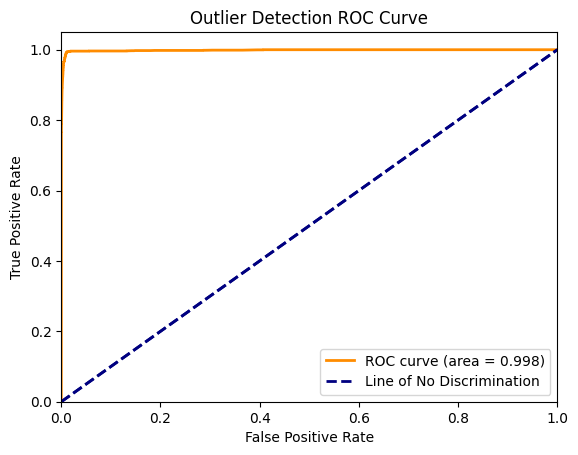

In [7]:
from sklearn.metrics import classification_report, f1_score, roc_auc_score, roc_curve

# Initialize unsupervised outlier detectors
knn_detector = KNN()

# Setup XGBOD with the unsupervised detector list
xgbod = XGBOD(estimator_list=[knn_detector],
              standardization_flag_list=[True],
              max_depth=3,
              learning_rate=0.1,
              n_estimators=100,
              objective='binary:logistic',
              booster='gbtree',
              n_jobs=40,
              gamma=0,
              min_child_weight=1,
              subsample=1,
              colsample_bytree=1,
              colsample_bylevel=1,
              reg_alpha=0,
              reg_lambda=1,
              scale_pos_weight=1,
              base_score=0.5,
              random_state=0)

xgbod.fit(X_train, y_train)

# Predicting the outliers
outlier_labels = xgbod.predict(X_test)
outlier_scores = xgbod.decision_function(X_test)

f1 = f1_score(y_test, outlier_labels)
print("F1 Score:", f1)

print("ROC AUC Score:", roc_auc_score(y_test, outlier_scores))

fpr, tpr, _ = roc_curve(y_test, outlier_scores)
roc_auc = roc_auc_score(y_test, outlier_scores)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Line of No Discrimination')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Outlier Detection ROC Curve')
plt.legend(loc="lower right")
plt.show()